In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [2]:
# Load the data
df = pd.read_csv('titanic (1).csv')

In [3]:
# Data normalization
def normalize_data(data):
    data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())
    data['Age'] = data['Age'].fillna(data['Age'].dropna().median())

    data.loc[data['gender'] == 'male', 'gender'] = 0
    data.loc[data['gender'] == 'female', 'gender'] = 1

    data['Embarked'] = data['Embarked'].fillna('S')
    data.loc[data['Embarked'] == 'S', 'Embarked'] = 0
    data.loc[data['Embarked'] == 'C', 'Embarked'] = 1
    data.loc[data['Embarked'] == 'Q', 'Embarked'] = 2

    return data

In [4]:
train = normalize_data(df)

In [5]:
# Data splitting
labels = train['Survived'].values
feature_names = ['Pclass', 'Age', 'Fare', 'Embarked', 'gender', 'SibSp', 'Parch']
features = train[feature_names].values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [6]:
# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dropout(0.2),  # Adding dropout regularization
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Adding dropout regularization
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [10]:
# Model training
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
18/18 [==============================] - 1s 14ms/step - loss: 0.5869 - accuracy: 0.7118 - val_loss: 0.4621 - val_accuracy: 0.8322
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4901 - accuracy: 0.7926 - val_loss: 0.4039 - val_accuracy: 0.8112
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4554 - accuracy: 0.8084 - val_loss: 0.3936 - val_accuracy: 0.8252
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4512 - accuracy: 0.8084 - val_loss: 0.3933 - val_accuracy: 0.8182
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4403 - accuracy: 0.8120 - val_loss: 0.3903 - val_accuracy: 0.8392
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4345 - accuracy: 0.8120 - val_loss: 0.3899 - val_accuracy: 0.8322
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4183 - accuracy: 0.8295 - val_loss: 0.3885 - val_accuracy: 0.8322
Epoch 8/50
18/18 [=

In [11]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

6/6 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.7989
Test Accuracy: 0.7988826632499695


In [12]:
# Plot learning curves
def plot_learning_curves(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

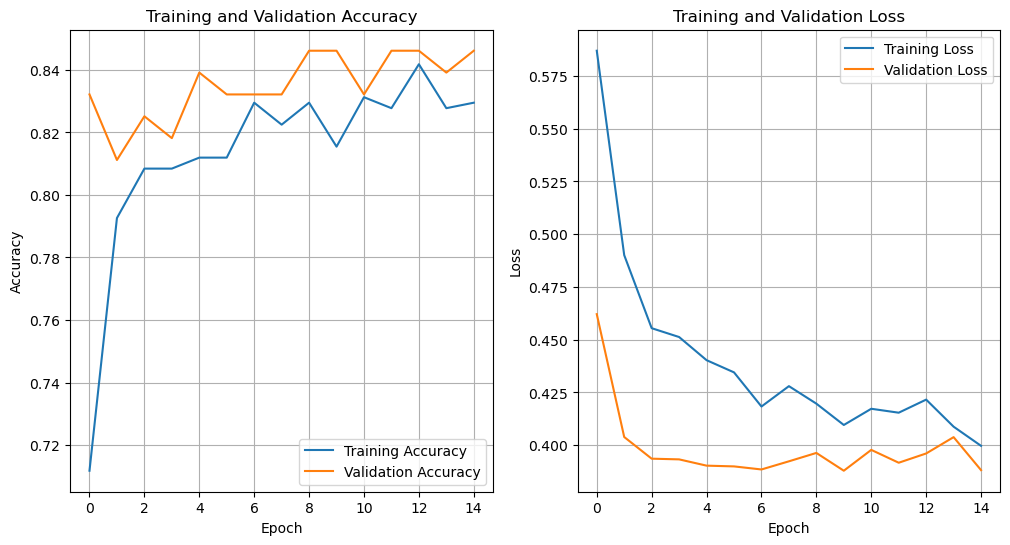

In [13]:
plot_learning_curves(history)

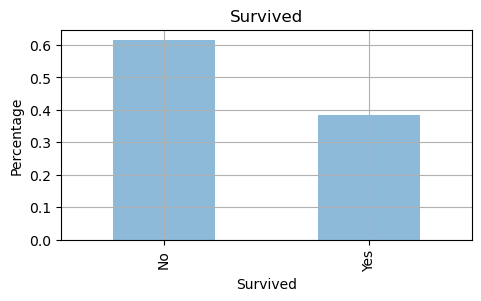

In [15]:
# Plotting the columns

# Plot 1: Survival Distribution
plt.figure(figsize=(18, 6))
plt.subplot2grid((2, 3), (0, 0))
df['Survived'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Survived')
plt.xlabel('Survived')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(True)

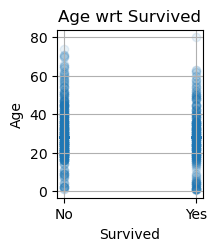

In [16]:
# Plot 2: Age vs. Survival
plt.subplot2grid((2, 3), (0, 1))
plt.scatter(df['Survived'], df['Age'], alpha=0.1)
plt.title('Age wrt Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(True)

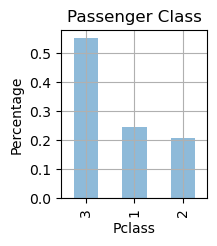

In [18]:
# Plot 3: Passenger Class Distribution
plt.subplot2grid((2, 3), (0, 2))
df['Pclass'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Percentage')
plt.grid(True)

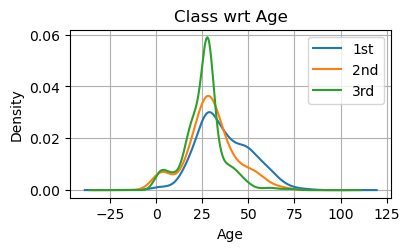

In [19]:
# Plot 4: Class vs. Age KDE Plot
plt.subplot2grid((2, 3), (1, 0), colspan=2)
for x in [1, 2, 3]:
    df.Age[df.Pclass == x].plot(kind='kde')
plt.title('Class wrt Age')
plt.xlabel('Age')
plt.legend(('1st', '2nd', '3rd'))
plt.grid(True)